In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
master_data=pd.merge(study_results,mouse_metadata,how="left",on=["Mouse ID","Mouse ID"])

# Display the data table for preview
master_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_number=master_data["Mouse ID"].nunique()
mice_number

249

In [3]:
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice=master_data[master_data.duplicated(subset=["Mouse ID","Timepoint"])]["Mouse ID"].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
#Get all the data for the duplicate mouse ID.
duplicate_mice_df=master_data[master_data["Mouse ID"].isin(duplicate_mice)]
duplicate_mice_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_master_data=master_data[~master_data["Mouse ID"].isin(duplicate_mice)]
cleaned_master_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mice_count=cleaned_master_data["Mouse ID"].nunique()
cleaned_mice_count

248

# Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance,
# standard deviation, and SEM of the tumor volume for each regimen.
summary_statistics_df=pd.DataFrame()
summary_statistics_df["Mean Tumor Volume"]=cleaned_master_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
summary_statistics_df["Median Tumor Volume"]=cleaned_master_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
summary_statistics_df["Tumor Volume Variance"]=cleaned_master_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
summary_statistics_df["Tumor Volume Std. Dev."]=cleaned_master_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
summary_statistics_df["Tumor Volume Std. Err."]=cleaned_master_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary_statistics_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Bar and Pie Charts

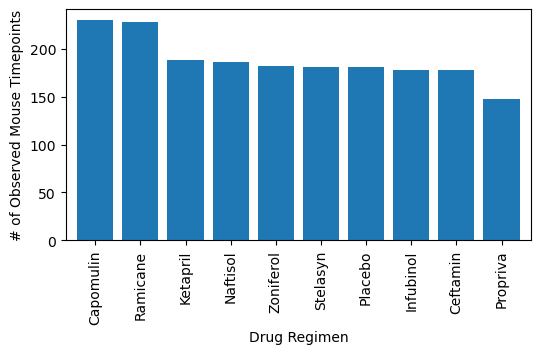

In [8]:
# Group the DataFrame by 'Drug Regimen' and count the number of rows for each group
drug_counts = cleaned_master_data["Drug Regimen"].value_counts().reset_index()
drug_counts.columns = ["Drug Regimen", "# of Observed Mouse Timepoints"]

# Create a bar plot using pandas
drug_counts.plot(kind="bar", ylabel="# of Observed Mouse Timepoints",
                            x="Drug Regimen", y="# of Observed Mouse Timepoints", 
                            legend=False, figsize=(6, 3), width=0.8)

# Show the plot
plt.show()

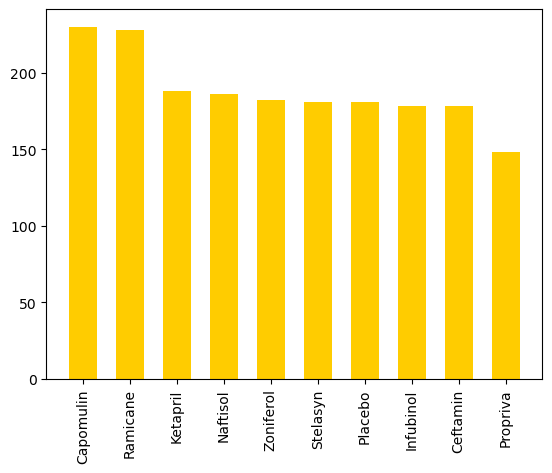

In [9]:
#Create a bar plot using matplot
bar_color=(1.0, 0.8, 0.0) 
plt.bar(drug_counts["Drug Regimen"],drug_counts["# of Observed Mouse Timepoints"],width=0.6,color=bar_color)

plt.xticks(rotation='vertical')

plt.show()

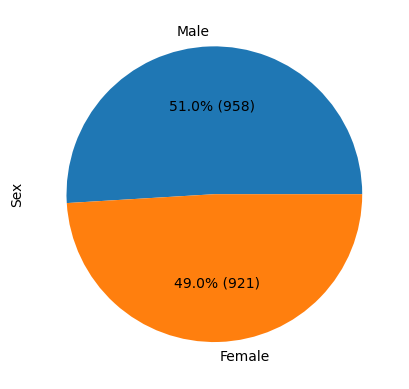

In [10]:
#Group by male and female mice
sex_mice=cleaned_master_data["Sex"].value_counts().reset_index()
sex_mice.columns=["Sex","Total"]

## Create a pie plot using pandas
sex_mice.plot(kind="pie", ylabel="Sex",
                            labels=sex_mice["Sex"],y="Total",
                        autopct=lambda p: f'{p:.1f}% ({int(p * sum(sex_mice["Total"])/100)})',
                        legend=False)
plt.show()

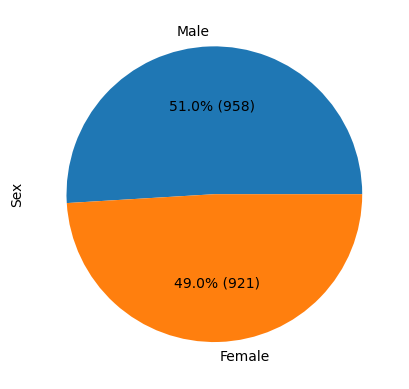

In [11]:
## Create a pie plot using matplot
plt.pie(sex_mice["Total"],labels=sex_mice["Sex"],
        autopct=lambda p: f'{p:.1f}% ({int(p * sum(sex_mice["Total"])/100)})')

plt.ylabel("Sex")
plt.show()

# Quartiles, Outliers and Boxplots

In [12]:
#Getting the last (greatest) timepoint for each mouse
greatest_timepoint=cleaned_master_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

#Get the tumor volume at the last timepoint
merged_master_data=pd.merge(greatest_timepoint,cleaned_master_data,on=["Mouse ID","Timepoint"])
merged_master_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [13]:
#List of Treatments
treatments_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#list of Tumor volume
tumor_volume_dic={}
for treatment in treatments_list:
    tumor_volume_list=merged_master_data.loc[(merged_master_data["Drug Regimen"]==treatment),"Tumor Volume (mm3)"].tolist()
    tumor_volume_dic[treatment]=tumor_volume_list
    # Calculate the IQR (Interquartile Range)
    Q1 = np.percentile(tumor_volume_dic[treatment], 25)
    Q3 = np.percentile(tumor_volume_dic[treatment], 75)
    IQR = Q3 - Q1

    # Determine the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = [x for x in tumor_volume_dic[treatment] if (x > upper_bound or x < lower_bound)]
    outliers_serries=pd.Series(outliers,name='Tumor Volume (mm3)',dtype='float64')
    
    #print the results
    print(f"{treatment}'s potential outliers: {outliers_serries}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 0    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


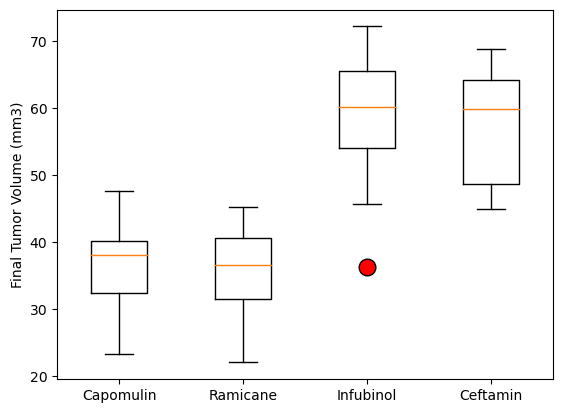

In [14]:
plt.boxplot(tumor_volume_dic.values(), labels=tumor_volume_dic.keys(),
            flierprops={'marker': 'o', 'markerfacecolor': 'red','markersize': 12})
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

# Line and Scatter Plots

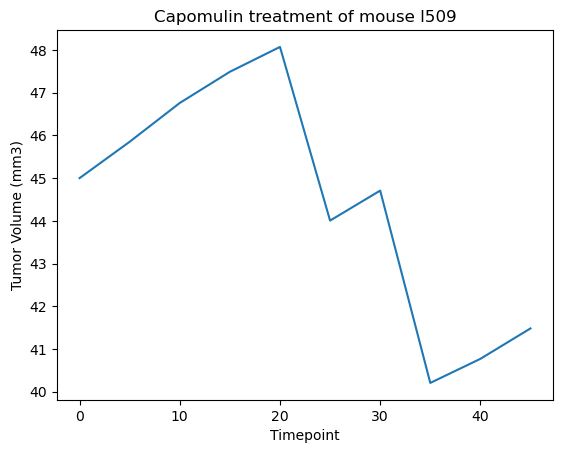

In [15]:
#Line plot of tumor volume vs. time point for mouse l509 treated with Capomulin
mouse_l509=cleaned_master_data.loc[(cleaned_master_data["Mouse ID"]=="l509"),["Timepoint","Tumor Volume (mm3)"]]

plt.plot(mouse_l509["Timepoint"],mouse_l509["Tumor Volume (mm3)"])

plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

plt.show()

In [16]:
#Capomulin treatment dataset
capomulin_data = cleaned_master_data[cleaned_master_data["Drug Regimen"]=="Capomulin"]

#Average Tumor Volumn by weight for Capomulin treatment
average_tumor_weight = capomulin_data.groupby("Mouse ID")[["Tumor Volume (mm3)", "Weight (g)"]].mean()

average_tumor_weight

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0
i557,44.805810,24.0
i738,39.141053,20.0
j119,44.465236,23.0
j246,43.216925,21.0


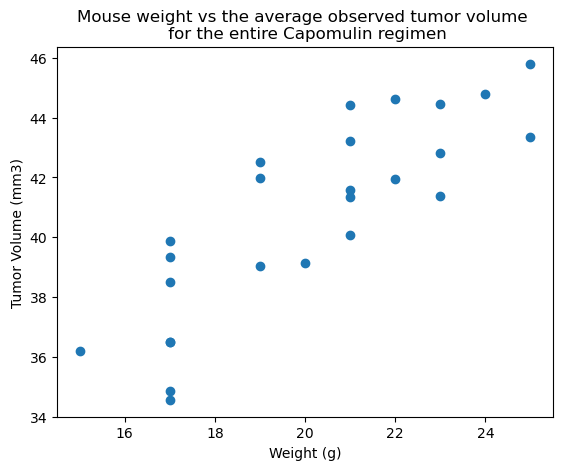

In [28]:
#Plot scatter chart of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(average_tumor_weight["Weight (g)"],average_tumor_weight["Tumor Volume (mm3)"])
plt.title("Mouse weight vs the average observed tumor volume \n for the entire Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

The correlation between mouse weight and the average tumor volume is 0.84


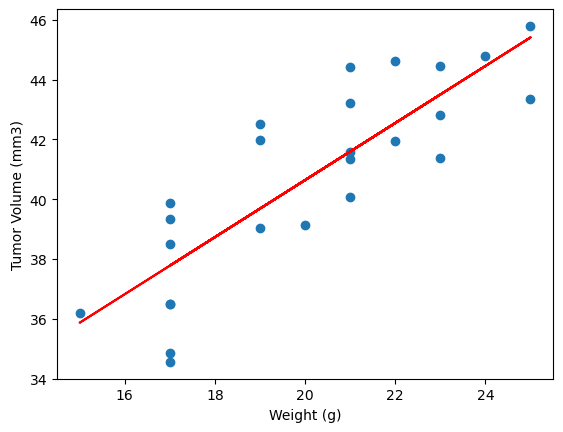

In [24]:
#Plot scatter chart of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

plt.scatter(average_tumor_weight["Weight (g)"],average_tumor_weight["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

#Calculate the correlation coefficient (Pearson correlation)
correlation_coefficient = st.pearsonr(average_tumor_weight["Weight (g)"], average_tumor_weight["Tumor Volume (mm3)"])

#Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(
    average_tumor_weight["Weight (g)"], average_tumor_weight["Tumor Volume (mm3)"])

#Create the regression line
regression_line = slope * average_tumor_weight["Weight (g)"] + intercept

#Plot the regression line
plt.plot(average_tumor_weight["Weight (g)"], regression_line, color="red")

#Display the plot
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient[0]:.2f}")
plt.show()
